# Coursework 1: Convolutional Neural Networks 
### Autograding
Part 1 of this coursework is autograded. This notebook comes with embedded tests which will verify that your implementations provide outputs with the appropriate types and shapes required for our hidden tests. You can run these same public tests through [LabTS](https://teaching.doc.ic.ac.uk/labts) when you have finished your work, to check that we get the same results when running these public tests.

Hidden tests will be ran after the submission deadline, and cannot be accessed :)

### Setting up working environment 

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory or Lab cluster, where you can access GPUs.

Please refer to the Intro lecture for getting set up on the various GPU options.

**To run the public tests within colab** you will need to copy the "tests" folder to the /content/ directory (this is the default working directory - you can also change directories with %cd). You may also need to place a copy of the CW ipynb in the /content/ directory. A better option is to mount colab on gdrive and keep the files there (so you only need to do the set up once).

#### Setup
You will need to install pytorch and other libraries by running the following cell:

<font color="orange">**The deadline for submission is Tuesday, 6 Feb by 6 pm** </font>

In [2]:
!pip install -q otter-grader pandoc torch torchvision scikit-learn seaborn

/bin/bash: /vol/bitbucket/kh123/dlcw1/DLCW1_venv/bin/pip: /vol/bitbucket/kh123/DLCW1_venv/bin/python3: bad interpreter: No such file or directory


In [29]:
# Initialization Cell
try:
    WORKING_ENV = 'LABS' # Can be LABS, COLAB, PAPERSPACE, SAGEMAKER
    USERNAME = 'kh123' # If working on Lab Machines - Your college username
    assert WORKING_ENV in ['LABS', 'COLAB', 'PAPERSPACE', 'SAGEMAKER']

    if WORKING_ENV == 'COLAB':
        from google.colab import drive
        %load_ext google.colab.data_table
        d1_cw1_repo_path = 'Lectureship/CW/dl_cw1/' # path in your gdrive to the repo
        content_path = f'/content/drive/MyDrive/{d1_cw1_repo_path}' # path to gitrepo in gdrive after mounting
        drive.mount('/content/drive/') # Outputs will be saved in your google drive

    elif WORKING_ENV == 'LABS':
        content_path = f'/vol/bitbucket/{USERNAME}/dl/dl_cw1/' # You may want to change this
        # Your python env and training data should be on bitbucket
        if 'vol' not in content_path:
            import warnings
            warnings.warn(
                'It is best to create a dir in /vol/bitbucket/ otherwise you will quickly run into memory issues'
            )

    elif WORKING_ENV == 'PAPERSPACE': # Using Paperspace
        # Paperspace does not properly render animated progress bars
        # Strongly recommend using the JupyterLab UI instead of theirs
        !pip install ipywidgets
        content_path = '/notebooks'

    elif WORKING_ENV == 'SAGEMAKER':
        content_path = '/home/studio-lab-user/sagemaker-studiolab-notebooks/'
    else:
        raise NotImplementedError()

    import otter
    import os
    if not os.path.exists(f'{content_path}tests'):
        raise ValueError('Cannot find the public tests folder')
    grader = otter.Notebook(
        f'{content_path}dl_cw_1.ipynb',
        tests_dir=f'{content_path}tests')
    import matplotlib.pyplot as plt # DO NOT use %matplotlib inline in the notebook
    import numpy as np
    rng_seed = 90
except:
    # This is a fallback initialization for running on LabTS. Please leave this in place before submission.
    import otter
    grader = otter.Notebook("dl_cw_1.ipynb")
    import matplotlib.pyplot as plt
    import numpy as np
    rng_seed = 90


## Introduction
In this courswork you will explore various deep learning functionalities through implementing a number of pytorch neural network operations/layers and creating your own deep learning model and methodology for a high dimensional classification problem.

#### Intended learning outcomes
- An understanding of the mechanics behind convolutional, pooling, linear and batch norm operations. 
- Be able to implement convolution, pooling, linear and batch norm layers from basic building blocks.
- Experience designing, implementing and optimising a classifier for a high dimensional dataset.

## Part 1 (50 points)

In this part, you will use basic Pytorch operations to define the 2D convolution, 2D max pooling, linear layer, as well as 2D batch normalization operations. Being computer scientists we care about efficiency, we therefore do not want to see any _for loops_!

**Your Task**
- Implement the forward pass for Conv2D (15 points), MaxPool2D (15 points), Linear (5 points) and BatchNorm2d (15 points)
- You are **NOT** allowed to use the torch.nn modules (The one exception is that the class inherits from nn.Module)

_hint: check out F.unfold and F.fold, they may be helpful_

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height H' and width W'.

        Parameters:
        - w: Filter weights of shape (F, C, H', W',)
        - b: Biases of shape (F,)
        - kernel_size: Union[int, (int, int)], Size of the convolving kernel
        - stride: Union[int, (int, int)], Number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: Union[int, (int, int)], Number of pixels that will be used to zero-pad the input.
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Define the parameters used in the forward pass
        self.in_channels = in_channels
        self.out_channels = out_channels
        # Do not initialize weights or biases with torch.empty() but rather use torch.zeros()
        # Weights should have shape [out_channels, in_channels, kernel_x, kernel_y]
        if type(kernel_size) == int:
          kernel_x = kernel_size
          kernel_y = kernel_size
        else:
           kernel_x = kernel_size[0]
           kernel_y = kernel_size[1]
        
        self.w = torch.zeros([out_channels, in_channels, kernel_x, kernel_y])
        # Bias should have shape [out_channels] 
        self.b = torch.zeros([out_channels])
        self.F = out_channels
        self.C = in_channels
        self.kernel_size = (kernel_size, kernel_size) if isinstance(kernel_size, int) else kernel_size
        self.stride = (stride, stride) if isinstance(stride, int) else stride
        self.padding = (padding, padding) if isinstance(padding, int) else padding
        self.bias = bias

        ...
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Implement the forward pass                                     #
        
        N, C, H, W = x.shape
        
        # Calculate output dimensions
        H_out = (H + 2 * self.padding[0] - self.kernel_size[0]) // self.stride[0] + 1
        W_out = (W + 2 * self.padding[1] - self.kernel_size[1]) // self.stride[1] + 1
        
        # Unfold the input tensor to prepare it for matrix multiplication
        inp_unf = F.unfold(x, kernel_size=self.kernel_size, stride=self.stride, padding=self.padding)
        
        # Perform the matrix multiplication and then add bias if it's not None
        if self.bias:
            out_unf = inp_unf.transpose(1, 2).matmul(self.w.view(self.w.size(0), -1).t() + self.b)
        else:
            out_unf = inp_unf.transpose(1, 2).matmul(self.w.view(self.w.size(0), -1).t())
        
        # Reshape the output back to a tensor of shape (N, F, H', W')
        out = out_unf.transpose(1, 2).view(N, self.out_channels, H_out, W_out)

        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out 

In [31]:
grader.check("Convolution Layer")

Convolution Layer results: All test cases passed!
Convolution Layer - 1 message: Shape Test Passed
Convolution Layer - 2 message: Type Test Passed
Convolution Layer - 3 message: Param Name Test Passed
Convolution Layer - 4 message: Param Shape Test Passed

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: Union[int, (int, int)], the size of the window to take a max over
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        
        self.kernel_size = (kernel_size, kernel_size) if isinstance(kernel_size, int) else kernel_size
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, C, H', W').
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # Extract input dimensions
        N, C, H, W = x.shape
        KH, KW = self.kernel_size
        stride_h, stride_w = self.kernel_size # stride length is kernel size

        # Compute output dimensions
        H_out = (H - KH) // stride_h + 1
        W_out = (W - KW) // stride_w + 1

        # Initialize output tensor
        out = torch.zeros((N, C, H_out, W_out))

        # Perform max pooling
        for i in range(H_out):
            for j in range(W_out):
                h_start, w_start = i * stride_h, j * stride_w
                h_end, w_end = h_start + KH, w_start + KW
                window = x[:, :, h_start:h_end, w_start:w_end]
                out[:, :, i, j], _ = torch.max(window.reshape(N, C, -1), dim=-1)

        return out


In [33]:
grader.check("MaxPool Layer")

MaxPool Layer results: All test cases passed!
MaxPool Layer - 1 message: Shape Test Passed
MaxPool Layer - 2 message: Type Test Passed

In [34]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        # Also no initialisation methods for this reason
        self.w = torch.zeros([in_channels, out_channels])
        self.b = torch.zeros([out_channels])
        ...
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # Perform matrix multiplication between input x and weights w
        out = x.matmul(self.w)

        # Add bias if it's not None
        if self.b is not None:
            out += self.b
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [35]:
grader.check("Linear Layer")

Linear Layer results: All test cases passed!
Linear Layer - 1 message: Shape Test Passed
Linear Layer - 2 message: Type Test Passed
Linear Layer - 3 message: Param Name Test Passed
Linear Layer - 4 message: Param Shape Test Passed

In [36]:
class BatchNorm2d(nn.Module):
	def __init__(self, num_features, eps=1e-05, momentum=0.1):
		super(BatchNorm2d, self).__init__()
		"""
		An implementation of a Batch Normalization over a mini-batch of 2D inputs.

		The mean and standard-deviation are calculated per-dimension over the
		mini-batches and gamma and beta are learnable parameter vectors of
		size num_features.

		Parameters:
		- num_features: C from an expected input of size (N, C, H, W).
		- eps: a value added to the denominator for numerical stability. Default: 1e-5
		- momentum: the value used for the running_mean and running_var
		computation. Default: 0.1 . (i.e. 1-momentum for running mean)
		- gamma: the learnable weights of shape (num_features).
		- beta: the learnable bias of the module of shape (num_features).
		"""
		# TODO: Define the parameters used in the forward pass                 #
		# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
		self.num_features = num_features
		self.eps = eps
		self.momentum = momentum

		# self.register_parameter is not used as it was mentioned on piazza
		# that this will be overridden
		self.gamma = torch.zeros([num_features])
		self.beta = torch.zeros([num_features])
  
		# Running mean and variance
		self.register_buffer('running_mean', torch.zeros(num_features))
		self.register_buffer('running_var', torch.ones(num_features))

		# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

	def forward(self, x):
		"""
		During training this layer keeps running estimates of its computed mean and
		variance, which are then used for normalization during evaluation.
		Input:
		- x: Input data of shape (N, C, H, W)
		Output:
		- out: Output data of shape (N, C, H, W) (same shape as input)
		"""
		# TODO: Implement the forward pass                                     #
		#       (be aware of the difference for training and testing)          #
		# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
  
		if self.training:
			# calc mean and variance for the batch
			mean = x.mean([0, 2, 3], keepdim=True)
			var = x.var([0, 2, 3], keepdim=True, unbiased=False)

			# update running estimates
			self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * mean
			self.running_var = (1 - self.momentum) * self.running_var + self.momentum * var

			# normalize input
			x = (x - mean) / torch.sqrt(var + self.eps)
		else:
			# normalize input using running estimates during evaluation
			x = (x - self.running_mean.view(1, -1, 1, 1)) / torch.sqrt(self.running_var.view(1, -1, 1, 1) + self.eps)

			# apply scale and shift (gamma and beta)
			x = x * self.gamma.view(1, -1, 1, 1) + self.beta.view(1, -1, 1, 1)

		# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
		return x

In [37]:
grader.check("BatchNorm Layer")

BatchNorm Layer results: All test cases passed!
BatchNorm Layer - 1 message: Shape Test Passed
BatchNorm Layer - 2 message: Type Test Passed
BatchNorm Layer - 3 message: Param Name Test Passed
BatchNorm Layer - 4 message: Param Shape Test Passed

## Part 2 (40 points)

In this part, you will design, train and optimise a custom deep learning model for classifying a specially selected subset of Imagenet. Termed NaturalImageNet, it is made up of a hand selected subset of the famous ImageNet dataset. The dataset contains 20 classes, all animals from the natural world. We hope that this dataset will be fun to work with but also a challenge.

You will be marked on your experimental process, methods implemented and your reasoning behind your decisions. While there will be marks for exceeding a baseline performance score we stress that students should **NOT** spend excessive amounts of time optimising performance to silly levels.

We have given you some starter code, please feel free to use and adapt it.

**Your Task**
1. Develop/adapt a deep learning pipeline to maximise performance on the test set. (28 points)
    * 8 points will be awarded for improving on the baseline score on the test set. Don't worry you can get full marks here by improving by a minor amount.
    * 20 points will be awarded for the adaptations made to the baseline model and pipeline.

2. Answer the qualititative questions (12 points)

**Downloading NaturalImageNet**

In [3]:
ON_COLAB = False

!wget https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
!wget https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
if ON_COLAB:
    !unzip /content/NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip /content/NaturalImageNetTrain.zip?download=1 > /dev/null
else: 
    !unzip NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip NaturalImageNetTrain.zip?download=1 > /dev/null

--2024-02-02 02:32:19--  https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
Resolving zenodo.org (zenodo.org)... 2001:1458:d00:9::100:195, 2001:1458:d00:3b::100:200, 2001:1458:d00:3a::100:33a, ...
Connecting to zenodo.org (zenodo.org)|2001:1458:d00:9::100:195|:443... connected.


HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/5846979/files/NaturalImageNetTest.zip [following]
--2024-02-02 02:32:19--  https://zenodo.org/records/5846979/files/NaturalImageNetTest.zip
Reusing existing connection to [zenodo.org]:443.
HTTP request sent, awaiting response... 200 OK
Length: 138507970 (132M) [application/octet-stream]
Saving to: ‘NaturalImageNetTest.zip?download=1’

NaturalImageNetTest 100%[===================>] 132.09M   132MB/s    in 1.0s    

2024-02-02 02:32:21 (132 MB/s) - ‘NaturalImageNetTest.zip?download=1’ saved [138507970/138507970]

--2024-02-02 02:32:21--  https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
Resolving zenodo.org (zenodo.org)... 2001:1458:d00:3a::100:33a, 2001:1458:d00:3b::100:200, 2001:1458:d00:9::100:195, ...
Connecting to zenodo.org (zenodo.org)|2001:1458:d00:3a::100:33a|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/5846979/files/Na

In [1]:
#torch
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, ConcatDataset
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
#other
import matplotlib.pyplot as plt
import numpy as np
# set the seed for reproducibility
rng_seed = 90
torch.manual_seed(rng_seed)

In [2]:
import copy

ON_COLAB = False

# When we import the images we want to first convert them to a tensor. 
# It is also common in deep learning to normalise the the inputs. This 
# helps with stability.
# To read more about this subject this article is a great one:
# https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0

# transforms is a useful pytorch package which contains a range of functions
# for preprocessing data, for example applying data augmentation to images 
# (random rotations, blurring the image, randomly cropping the image). To find out
# more please refer to the pytorch documentation:
# https://pytorch.org/docs/stable/torchvision/transforms.html

mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])

# Original transforms given in the coursework
transform_original = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize(mean.tolist(), std.tolist()),
])

# Augmentation transforms to produce agumented data
transform_augmentation = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),  # some augmentation
    transforms.RandomRotation(10),  # random rotation  (-10 to 10 degrees)
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # random color jitter
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize(mean.tolist(), std.tolist()),
])

train_path = ('/content/' if ON_COLAB else '') + 'NaturalImageNetTrain'
test_path = ('/content/' if ON_COLAB else '') +'NaturalImageNetTest'

train_dataset = datasets.ImageFolder(train_path, transform=transform_original) # Original dataset

test_dataset = datasets.ImageFolder(test_path, transform=transform_original)

# Create train val split
n = len(train_dataset)
n_val = int(n/10)

train_set_original, val_set = torch.utils.data.random_split(train_dataset, [n-n_val, n_val])

train_set_augmented = copy.deepcopy(train_set_original)
train_set_augmented.dataset.transform = transform_augmentation
extended_train_set = ConcatDataset([train_set_original, train_set_augmented]) # Combine datasets


print(len(extended_train_set), len(val_set), len(test_dataset))


# The number of images to process in one go. If you run out of GPU
# memory reduce this number! 
batch_size = 8

# Dataloaders are a great pytorch functionality for feeding data into our AI models.
# see https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# for more info.

loader_train = DataLoader(extended_train_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_val = DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

35972 1998 2000


In [3]:
unnormalize = transforms.Normalize((-mean / std).tolist(), (1.0 / std).tolist())

def denorm(x):
    '''
    Function to reverse the normalization so that we can visualise the outputs
    '''
    x = unnormalize(x)
    x = x.view(x.size(0), 3, 256, 256)
    return x

def show(img):
    '''
    function to visualise tensors
    '''
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)).clip(0, 1))

**Visualising some example images** 

Agumented Images


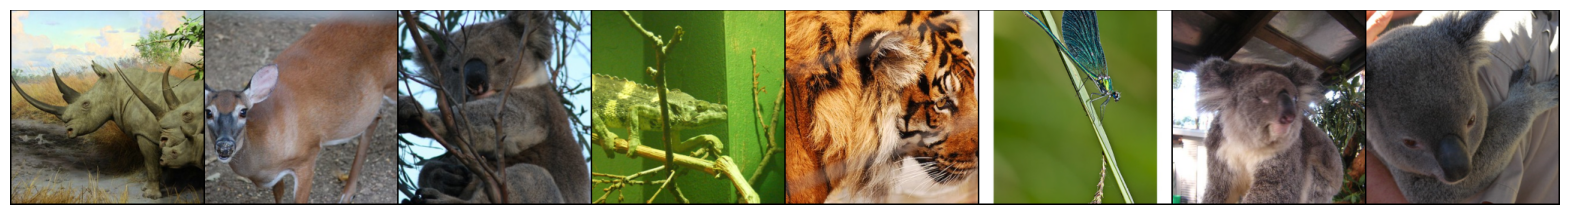

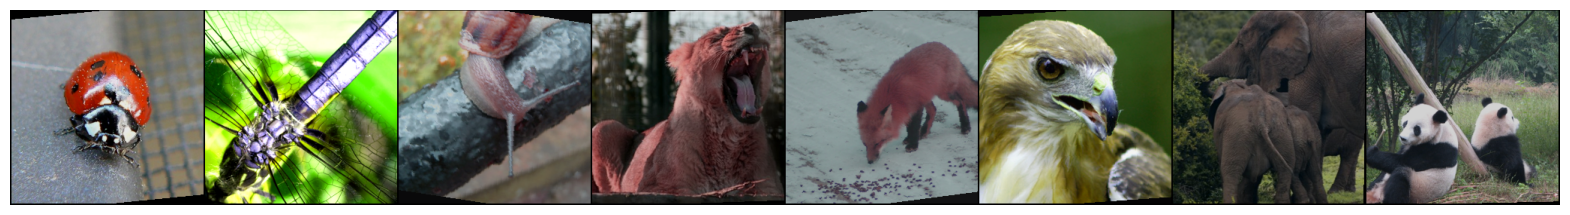

In [16]:
# original code visualising validation dataset
sample_inputs, _ = next(iter(loader_val))
fixed_input = sample_inputs[:27, :, :, :]

img = make_grid(denorm(fixed_input), nrow=9, padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)
plt.figure(figsize=(20,10))
plt.axis('off')
show(img)

# check that augmented-only dataset is actually augmented
loader_train_augmented = DataLoader(train_set_augmented, batch_size=batch_size, shuffle=True, num_workers=2)
sample_inputs, _ = next(iter(loader_train_augmented))
fixed_input = sample_inputs[:27, :, :, :]
img = make_grid(denorm(fixed_input), nrow=9, padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)
plt.figure(figsize=(20,10))
plt.axis('off')
show(img)

Next, we define ResNet-34:

In [17]:
# define resnet building blocks

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        
        self.left = nn.Sequential(
            Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_channels)
        )
        
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, padding=0, bias=False),
                nn.BatchNorm2d(out_channels)
            )
            
    def forward(self, x):
        out = self.left(x)
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_classes=20):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Sequential(
            Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.maxpool = MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self.make_layer(block, 64, 3, stride=1)
        self.layer2 = self.make_layer(block, 128, 4, stride=2)
        self.layer3 = self.make_layer(block, 256, 6, stride=2)
        self.layer4 = self.make_layer(block, 512, 3, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)
        
    def make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x
    
# please do not change the name of this class
def MyResNet():
    return ResNet(ResidualBlock) 

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def confusion(preds, y):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # Plotting the confusion matrix
  cm = confusion_matrix(y.cpu().numpy(), preds.cpu().numpy(), normalize='true')
  fig, ax= plt.subplots(1, 1, figsize=(15,10))
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(labels, rotation = 70); ax.yaxis.set_ticklabels(labels, rotation=0);
  plt.show()

def incorrect_preds(preds, y, test_img):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # lets see a sample of the images which were classified incorrectly!
  correct = (preds == y).float()
  test_labels_check = correct.cpu().numpy()
  incorrect_indexes = np.where(test_labels_check == 0)

  if len(incorrect_indexes) > 0:  # Check if there are any incorrect predictions
      test_img = test_img.cpu()
      samples = make_grid(denorm(test_img[incorrect_indexes][:9]), nrow=3,
                          padding=2, normalize=False, value_range=None,
                          scale_each=False, pad_value=0)
      plt.figure(figsize=(20,10))
      plt.title('Incorrectly Classified Instances')
      show(samples)
      labels = np.asarray(labels)
      print('Predicted label', labels[preds[incorrect_indexes].cpu().numpy()[:9]])
      print('True label', labels[y[incorrect_indexes].cpu().numpy()[:9]])
      print('Corresponding images are shown below')
  else:
      print("No incorrectly classified instances found.")

  # test_img = test_img.cpu()
  # samples = make_grid(denorm(test_img[incorrect_indexes][:9]), nrow=3,
  #                     padding=2, normalize=False, value_range=None, 
  #                     scale_each=False, pad_value=0)
  # plt.figure(figsize = (20,10))
  # plt.title('Incorrectly Classified Instances')
  # show(samples)
  # labels = np.asarray(labels)
  # print('Predicted label',labels[preds[incorrect_indexes].cpu().numpy()[:9]])
  # print('True label', labels[y[incorrect_indexes].cpu().numpy()[:9]])
  # print('Corresponding images are shown below')

In [19]:
USE_GPU = True
dtype = torch.float32 

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:0')
elif torch.backends.mps.is_available():
    device = torch.device('mps')
else:
    device = torch.device('cpu')

print(device)
    
print_every = 10

def check_accuracy(loader, model, analysis=False):
    # function for test accuracy on validation and test set
    
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for t, (x, y) in enumerate(loader):
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            if t == 0 and analysis:
              stack_labels = y
              stack_predicts = preds
            elif analysis:
              stack_labels = torch.cat([stack_labels, y], 0)
              stack_predicts = torch.cat([stack_predicts, preds], 0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct of val set (%.2f)' % (num_correct, num_samples, 100 * acc))
        if analysis:
          print('check acc', type(stack_predicts), type(stack_labels))
          confusion(stack_predicts, stack_labels)
          incorrect_preds(preds, y, x)
        return float(acc)


        

def train_part(model, optimizer, epochs=1):
    """
    Train a model on NaturalImageNet using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            if t % print_every == 0:
                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
        check_accuracy(loader_val, model)
                

cuda:0


In [20]:
import pandas as pd

def train_and_evaluate(learning_rates, weight_decays, epochs, loader_val):
    best_acc = 0.0 # initialise best accuracy
    best_params = {} # initialise best params
    records = []
    
    for lr in learning_rates:
        for wd in weight_decays:
            if lr == 0.0001 and wd == 1e-7:
                continue
            # Instantiate the model for each set of hyperparameters
            model = MyResNet()
            optimizer = optim.Adamax(model.parameters(), lr=lr, weight_decay=wd)

            # Train the model
            print(f"Training with lr: {lr}, weight_decay: {wd}")
            train_part(model, optimizer, epochs)

            # Evaluate the model
            acc = check_accuracy(loader_val, model)
            
            # Record the hyperparameters and the validation accuracy
            records.append({
                'learning_rate': lr,
                'weight_decay': wd,
                'validation_accuracy': acc
            })
            
            # If this model is the best so far, remember its parameters
            if acc > best_acc:
                best_acc = acc
                best_params = {'learning_rate': lr, 'weight_decay': wd}
                # Save the best model's parameters
                torch.save(model.state_dict(), 'best_model.pt')

    # Print out the best accuracy and hyperparameters
    print(f"Best accuracy: {best_acc}")
    print(f"Best hyperparameters: {best_params}")
    
    results_df = pd.DataFrame(records)
    return results_df

# Define the grid of hyperparameters to search over
learning_rates = [1e-4]
weight_decays = [1e-6]

train_and_evaluate(learning_rates, weight_decays, epochs=15, loader_val=loader_val)


Training with lr: 0.0001, weight_decay: 1e-06
Epoch: 0, Iteration 0, loss = 2.7463
Epoch: 0, Iteration 10, loss = 2.9055
Epoch: 0, Iteration 20, loss = 4.3684
Epoch: 0, Iteration 30, loss = 3.2772
Epoch: 0, Iteration 40, loss = 2.8770
Epoch: 0, Iteration 50, loss = 3.4632
Epoch: 0, Iteration 60, loss = 3.0615
Epoch: 0, Iteration 70, loss = 2.4805
Epoch: 0, Iteration 80, loss = 2.7942
Epoch: 0, Iteration 90, loss = 2.2755
Epoch: 0, Iteration 100, loss = 2.8275
Epoch: 0, Iteration 110, loss = 2.9109
Epoch: 0, Iteration 120, loss = 2.5180
Epoch: 0, Iteration 130, loss = 2.8984
Epoch: 0, Iteration 140, loss = 2.1913
Epoch: 0, Iteration 150, loss = 3.0339
Epoch: 0, Iteration 160, loss = 2.7389
Epoch: 0, Iteration 170, loss = 2.3256
Epoch: 0, Iteration 180, loss = 2.0398
Epoch: 0, Iteration 190, loss = 2.8945
Epoch: 0, Iteration 200, loss = 2.8497
Epoch: 0, Iteration 210, loss = 3.1677
Epoch: 0, Iteration 220, loss = 2.7029
Epoch: 0, Iteration 230, loss = 2.1612
Epoch: 0, Iteration 240, loss

learning_rate  weight_decay  validation_accuracy
0         0.0001      0.000001             0.907908

---

<!-- BEGIN QUESTION -->

### Network Performance

Run the code below when all engineering decisions have been made, do not overfit to the test set!

**Note that** this will appear in the output, and be checked by markers (so ensure it is present in the auto-export)

Got 1773 / 2000 correct of val set (88.65)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


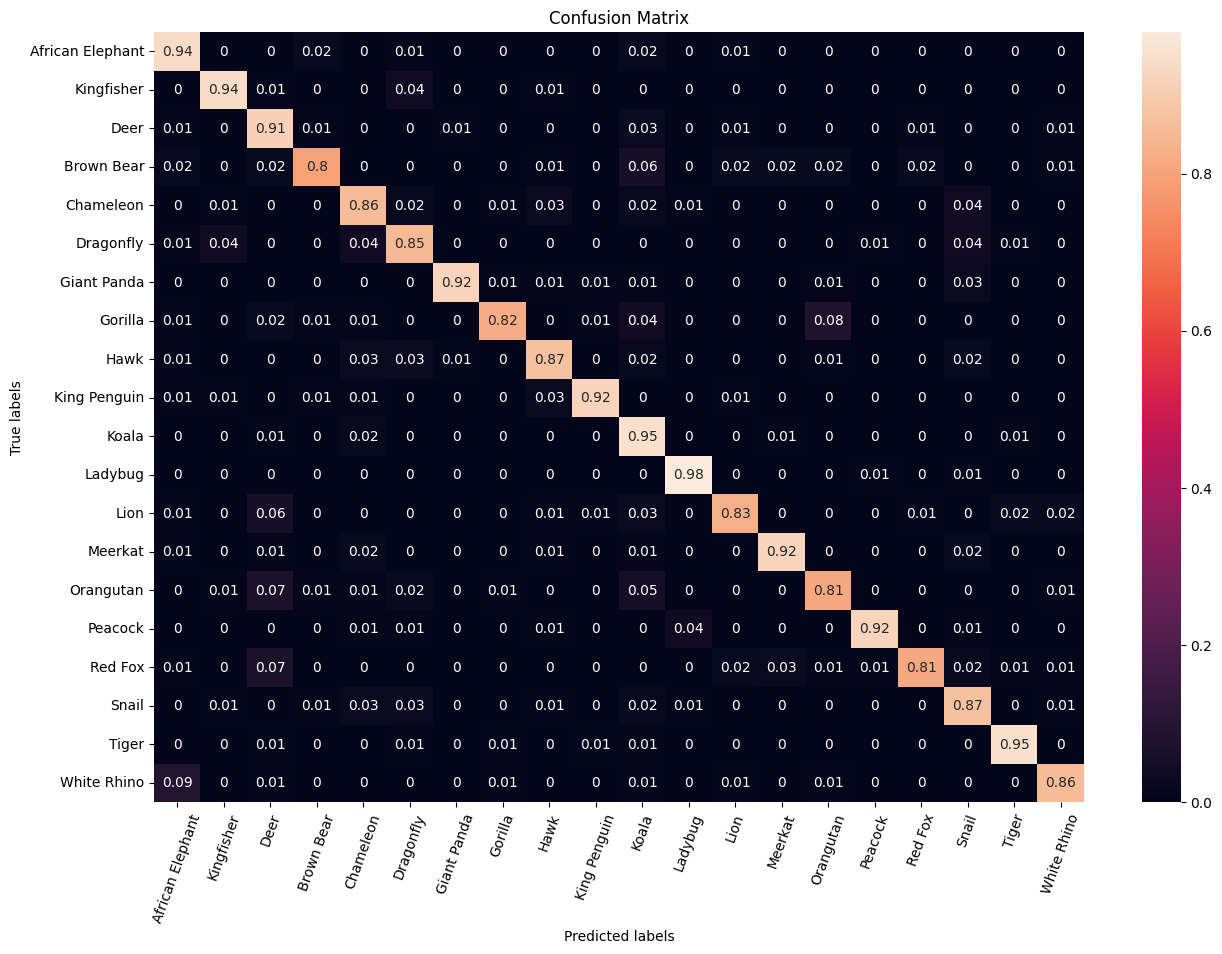

Predicted label ['Deer']
True label ['Koala']
Corresponding images are shown below


0.8865

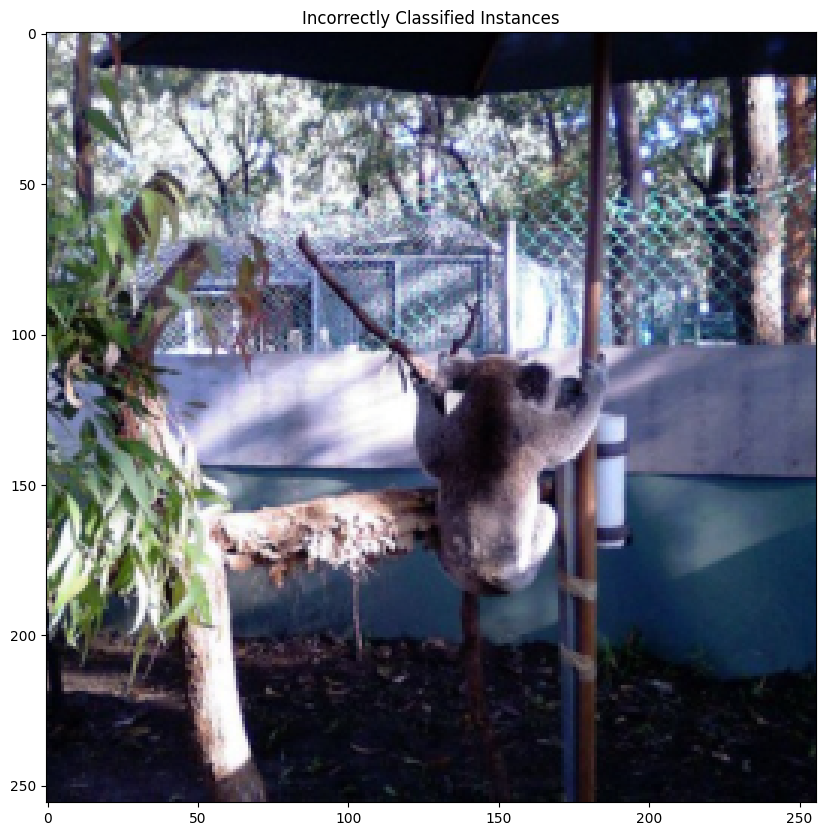

In [21]:
# Run once your have trained your final model
state_dict = torch.load('best_model.pt')
model = MyResNet()
model.load_state_dict(state_dict)
model = model.to(device)

check_accuracy(loader_test, model, analysis=True)

___

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.1: Hyperparameter Search:
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? (3 points)

**Answer:**

As the number of trainable parameters and training set size are both large, the best strategy for hyperparameter tuning involves researching for the most effective parameters, followed by a manual search, and finally an automated grid search.
First, research should be conducted to see which parameters are most likely to improve model accuracy and have the largest impact. These parameters can be considered as “major” parameters while less important parameters can be considered as “minor”. In this case, the ResNet architecture as well as agumentation were determined to be the most major parameters, investigated via a manual search. 

Second, manual search should be used to directly investigate hyperparameters, thereby efficiently investigating the parameters that are most likely to bring the largest improvements, such as architecture and augmentation. This also greatly reduces the initial search space, allowing for a more efficient automated grid search afterwards. For example, in this coursework, three ResNet architectures were investigated: the initial architecture, ResNet18, and ResNet34. As architecture depth increased, the model performance increased greatly, from 35% to 75% to 85%. Such large improvements are unlikely to come from minor hyperparameters like the learning rate, so major (less easily changeable) hyperparameters benefit from a manual search. 

Once major hyperparameters have been investigated, minor parameters (that are more changeable) can be investigated via an automated grid search. These parameters included learning and weight decay which are investigated through nested for loops. As expected, the grid search provided minor improvements in performance of only approximately 5%. While useful in optimising model performance, automated grid searches should only be employed when the search space is small and relatively simple, usually after manual exploration has already been performed.


---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.2: Engineering Decisions 

Detail which engineering decisions you made to boost the performance of the baseline results. Why do you think that they helped? (7 points)

**Answer:**

Several engineering decisions were made to increase model performance. They are:

**Adding augmented data to the training and validation dataset**

Augmenting the training dataset involves artificially increasing the diversity of data available for training models by augmenting the original data. In this coursework, techniques such as flipping, rotation, and colour jittering have been applied to provide variations that a model might encounter in real-world scenarios, making the model more robust during testing. Augmentation also helps reduce overfitting, forcing the model to generalize from the newly augmented data. Instead of randomly augmenting the original data, augmented copies were added to increase diversity and training set size while retaining all the information from the original dataset. Augmentation was carefully added to only the training set as validation and test data should remain unchanged to better represent the actual real-world distribution. 

**Using a deeper ResNet architecture (ResNet43)**

Increasing the depth of a ResNet architecture from the baseline ResNet model to the deeper ResNet43 introduced more layers that can capture a wider variety of features at different levels of abstraction. This significantly enhanced the model's learning capacity. While deeper networks are usually also more prone to overfitting and degradation, ResNet use of residual connections allow gradients to flow through the network more easily. This way, deeper ResNet networks are able to bypass certain blocks in the architecture if necessary, learning to ignore convolutional blocks and relying only on the residual connection. 

**Decreasing Batch Size**

As a deeper ResNet architecture was used, batch size was reduced to 8 to increase the level of noise introduced to the data and increase regularisation. As deeper and more complex models usually have a higher risk of overfitting, regularisation is key in maintaining generalisability. 

**Tuning the optimiser**

The Adamax optimiser was found to be the most effective, likely due to its ability to adjust learning rates according to scale and distribution introduced by batch normalisation. Adamax is also robust to noisy gradients, adapting learning rates based on the infinite norm. 

**Tuning the learning rate and weight decay**

Both parameters were found via grid search, fine-tuning the model to get the best performance. The optimal learning rate (10^-4) and weight decay (10^-6) ensure a balance between steady convergence and overfitting prevention. A lower learning rate facilitates gradual optimization and avoids instability, while the selected weight decay promotes model simplicity and generalization by penalizing large weights. This approach minimises overfitting risks, allowing the model to learn complex patterns effectively. 

**Increasing the number of epochs**

Increasing the number of epochs allowed for more learning cycles, crucial for complex image patterns. This extended exposure helped the ResNet34 architecture adjust weights more finely, enhancing pattern recognition. Careful monitoring prevented overfitting, crucial for maintaining generalization to unseen data. This approach was especially beneficial for ResNet's deep structure, ensuring each layer learned effectively without compromising performance.


---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.3: Out of distribution evaluation

Lets see how your trained model performs when evaluated on cartoons of the 20 animal classes. Do not try and modify your model to perform well on this task, this is just a reflective exercise. How did your model perform at the task? Why do you think this was the case? Detail one method which you expect would improve model performance. (2 points)

In [ ]:
ON_COLAB = False

!wget https://zenodo.org/records/10424022/files/cartoons.zip?download=1

if ON_COLAB:
    !unzip /content/cartoons.zip?download=1 > /dev/null

else:
    !unzip cartoons.zip?download=1 > /dev/null

--2024-02-04 02:09:30--  https://zenodo.org/records/10424022/files/cartoons.zip?download=1
Resolving zenodo.org (zenodo.org)... 2001:1458:d00:3b::100:200, 2001:1458:d00:9::100:195, 2001:1458:d00:3a::100:33a, ...
Connecting to zenodo.org (zenodo.org)|2001:1458:d00:3b::100:200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1737267 (1.7M) [application/octet-stream]
Saving to: ‘cartoons.zip?download=1.1’

cartoons.zip?downlo 100%[===================>]   1.66M  --.-KB/s    in 0.1s    

2024-02-04 02:09:31 (13.9 MB/s) - ‘cartoons.zip?download=1.1’ saved [1737267/1737267]

replace cartoons/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

^C


In [22]:
mean = torch.Tensor([0.485, 0.456, 0.406]) # assuming same dist as imagenet
std = torch.Tensor([0.229, 0.224, 0.225])
transform = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]

    )
cartoon_path = ('/content/' if ON_COLAB else '') + 'cartoons'


cartoon_dataset = datasets.ImageFolder(cartoon_path, transform=transform)

print(len(cartoon_dataset))

batch_size = 128

cartoon_loader = DataLoader(cartoon_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

400


In [23]:
sample_inputs, _ = next(iter(cartoon_loader))
fixed_input = sample_inputs[:27, :, :, :]

img = make_grid(denorm(fixed_input), nrow=9, padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)

plt.figure(figsize=(20,10))
plt.axis('off')
show(img)

Got 157 / 400 correct of val set (39.25)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


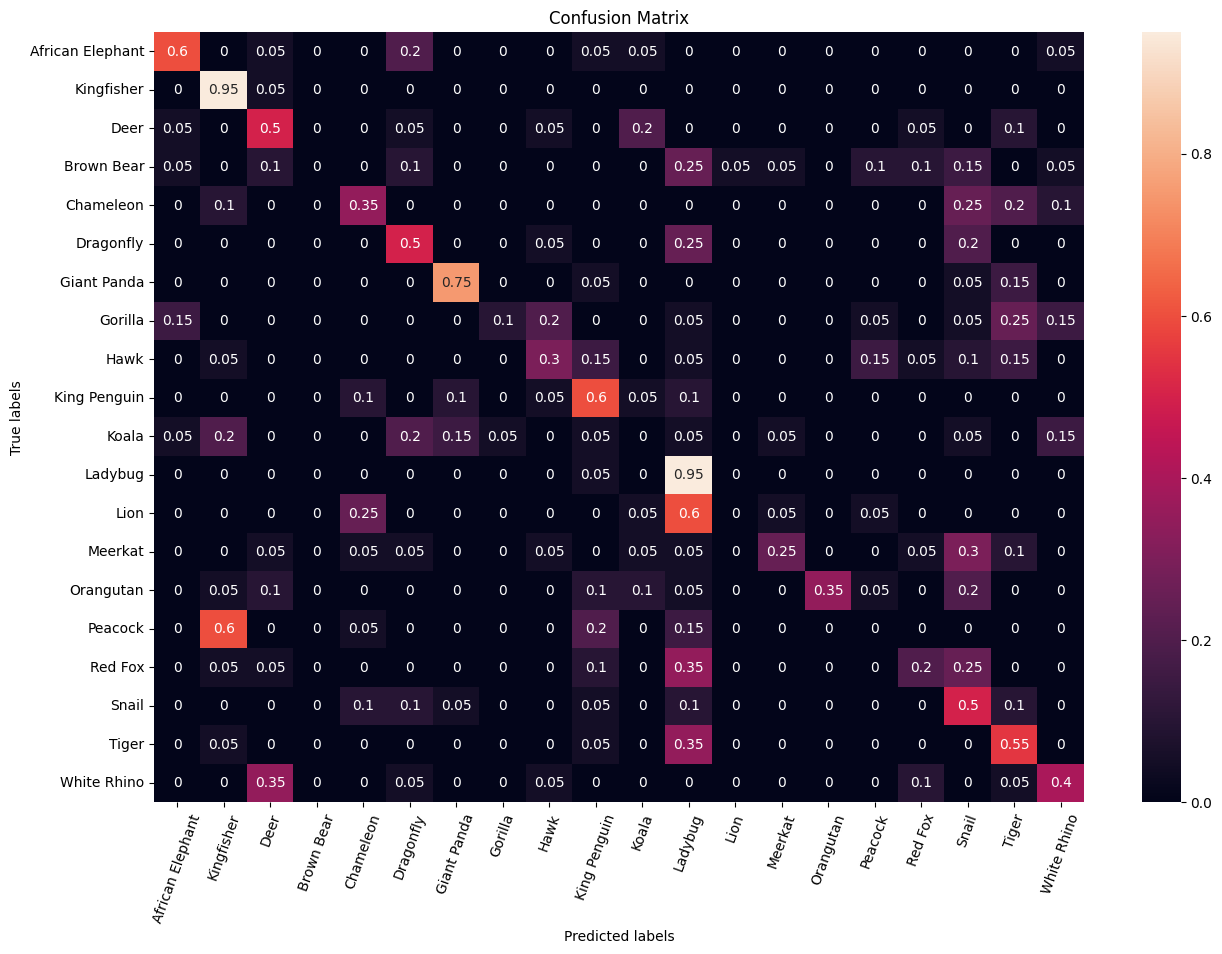

Predicted label ['Hawk' 'Hawk' 'Deer' 'Snail' 'Snail' 'Tiger' 'Ladybug' 'Hawk' 'Tiger']
True label ['Dragonfly' 'Gorilla' 'White Rhino' 'Red Fox' 'Orangutan' 'Giant Panda'
 'Brown Bear' 'Gorilla' 'Gorilla']
Corresponding images are shown below


0.3925

In [24]:
check_accuracy(cartoon_loader, model, analysis=True)

**Answer:**

When evaluated on cartoons, the model performed poorly, achieving only 39% accuracy. Performance on cartoons barely increased as the model was modified and improved for real animal images. In the baseline model, accuracy for cartoon recognition was approximately 28%, meaning that only a ~10% improvement in performance has been gained.

Performance remains poor because the test environment (cartoons) is too different from the training set (real images). Although augmentation has been applied, the model is not robust enough to perform well on cartoon images as these images differ greatly from real images of the animals.  While the cartoon versions retain some features of their real-life counterparts, the cartoons are usually gross caricatures, embellished with humanoid and child-appealing features such as large eyes and a bright colour palette. 

To improve model performance, cartoon images should be added to the training set to allow the model to learn cartoon features that are not present in real-life images. While an obvious fix, this is the most effective way to improve performance. As the cartoons differ greatly from the current training set increased augmentation is unlikely to increase model robustness, requiring the images from the cartoon distribution to be used in training instead.


<!-- END QUESTION -->

## Part 3 (10 points)

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions*(: 

<!-- BEGIN QUESTION -->

### Q3.1 : Learned Features

Compare the feature maps from low-level layers to high-level layers, what do you observe? (4 points)

**Answer:**

When comparing feature maps from the low-level layers to the high level layers, several observations can be made:

**Lower-Level Feature Maps:**

The feature maps from the initial layers (like conv1) capture the basic visual features of the image, highlighting the edge, colour, and texture changes, affecting the penguin as well as the image environment. These are fundamental patterns that do not represent complex structures yet but are essential building blocks for later features. As seen here, the activations are more visually interpretable and closely resemble the original input image with the penguin still recognisable. At the lower layers, it is observable that mostly color and edges are activated in Conv1 where edges and textures are mostly activated in Layer1.

**Higher-Level Feature Maps:**

As we progress deeper into the network (like layer 3 or 4), the feature maps represent more abstract concepts. These layers capture high-level features that represent parts of the penguin or any shapes relevant to the tasks. This mostly includes the contours of the penguin and features like its wings and head. The activations also become less visually interpretable, becoming more sparse and pixelated. This indicates that the network has learned to activate only for very specific stimuli that are relevant for the penguin classification.

In conclusion, there is a clear transition from generic to more abstract representations as the layers get deeper. Early layers are more generic with the penguin still clearly visible. On the other hand, the later layers are more specific to the details necessary for the penguin classification, highlighting the entire regions such as its head and wings. These observations align with the hierarchical nature of feature learning in CNNs, where lower layers act as feature detectors and higher layers combine these features to form more complex representations. 


---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.2: Performance Analysis

Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance? (4 points)

**Answer:**

Using evidence from the training log, test set accuracy, and feature maps, the performance of the network is sufficiently good. 
First, the training log shows that the model is learning properly, improving validation scores through each epoch. Within each epoch, the reported loss also consistently decreases with rare overshoots, verifying that a suitable learning rate was chosen. Second, the test set accuracy is extremely high at 88.6%, highly commendable for a classification task with 20 possible animal labels. This is a large improvement from the baseline model which scored only 30%. Lastly, the feature maps also evidence of how the model can recognise increasingly abstract features at higher layers, mostly highlighting areas that are most relevant to the animal in the image. In the feature maps of the penguin, it can be seen that  areas such as the penguin’s head and black contour lead to high activation, highlighting features that are highly representative of an actual penguin. 


---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.3: Alternative Evaluations

What are the other possible ways to analyse the performance of your network? (2 points)

**Answer:**

Other ways to analyse the model performance include the use of a confusion matrix and F-beta scores. 

A confusion matrix details the correct and incorrect predictions across different classes, allowing for an in-depth look at model precision and recall across all classes. It is especially useful to see which classes are most mistaken for other classes, allowing for specific corrections for those classes to be implemented in the future. 

F-beta scores, which are a generalisation of F1 scores, balance precision and recall and can be adjusted to prioritise one over the other. This is particularly useful in scenarios where false positives and false negatives have different costs, allowing an F-beta score to better summarise the performance of a model, suited to specific needs.

---

<!-- END QUESTION -->

**Feature Visualization**

The code below will visualize the features of your network layers (you may need to modify the layer names if you made changes to your architecture). 

If you change the plotting code, please ensure it still exports correctly when running the submission cell.

In [25]:
import matplotlib.pyplot as plt

def plot_model_features():
    fig = plt.tight_layout()
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4']

    for l in vis_labels:
        getattr(model, l).register_forward_hook(get_activation(l))
        

    data, _ = test_dataset[999]
    data = data.unsqueeze_(0).to(device = device, dtype = dtype)
    output = model(data)

    for idx, l in enumerate(vis_labels):
        act = activation[l].squeeze()

        # only showing the first 16 channels
        ncols, nrows = 8, 2
        
        fig, axarr = plt.subplots(nrows, ncols, figsize=(15,5))
        fig.suptitle(l)

        count = 0
        for i in range(nrows):
            for j in range(ncols):
                axarr[i, j].imshow(act[count].cpu())
                axarr[i, j].axis('off')
                count += 1

<!-- BEGIN QUESTION -->



<Figure size 640x480 with 0 Axes>

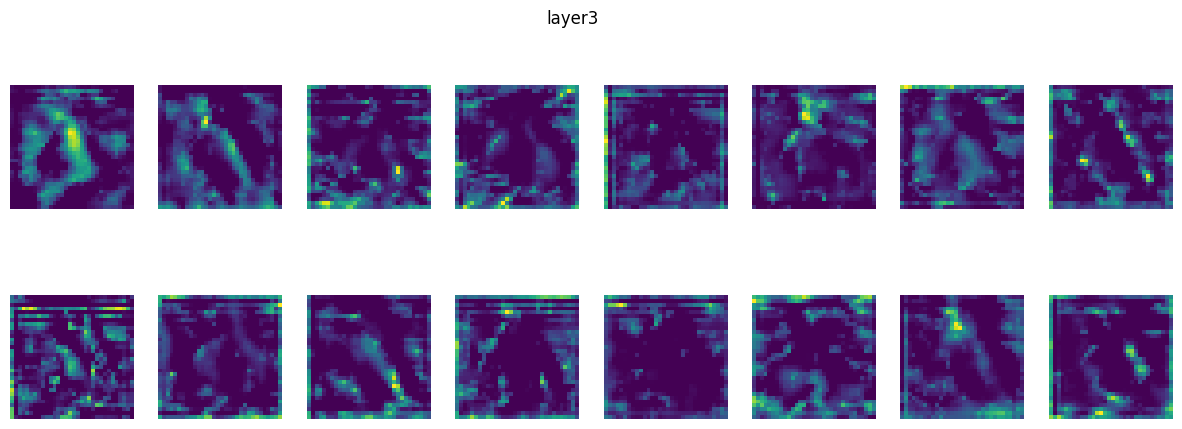

In [26]:
# Visualize the figure here, so it is exported nicely
plot_model_features()  

<!-- END QUESTION -->

## Submission
Git push your finalized version of this notebook (with saved outputs) to the gitlab repo which you were assigned. You should request our tests once and check that the ```preview.pdf```:
* Passes all public tests (these are the same ones provided / embedded in the notebook itself)
* Contains your qualitative answers
* Contains your figures (confusion matrix and network features)

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [38]:
grader.check_all()

BatchNorm Layer results: All test cases passed!
BatchNorm Layer - 1 message: Shape Test Passed
BatchNorm Layer - 2 message: Type Test Passed
BatchNorm Layer - 3 message: Param Name Test Passed
BatchNorm Layer - 4 message: Param Shape Test Passed

Convolution Layer results: All test cases passed!
Convolution Layer - 1 message: Shape Test Passed
Convolution Layer - 2 message: Type Test Passed
Convolution Layer - 3 message: Param Name Test Passed
Convolution Layer - 4 message: Param Shape Test Passed

Linear Layer results: All test cases passed!
Linear Layer - 1 message: Shape Test Passed
Linear Layer - 2 message: Type Test Passed
Linear Layer - 3 message: Param Name Test Passed
Linear Layer - 4 message: Param Shape Test Passed

MaxPool Layer results: All test cases passed!
MaxPool Layer - 1 message: Shape Test Passed
MaxPool Layer - 2 message: Type Test Passed